In [1]:
#from functions_load import call_remote_file_ssh
from functions_analysis import loader, total, repeatedSynID_remover, persyn
import pandas as pd
from scipy.spatial.distance import pdist, squareform


In [7]:
csv_file_path = '/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1.csv'
evtype = 1 # synch evs
singleSynFlag = [0, 168668]
grapherFlag = True
clusteringFlag = True
clusteringAlgorithmFlag = 3
plotFlag = True


no repeated synIDs


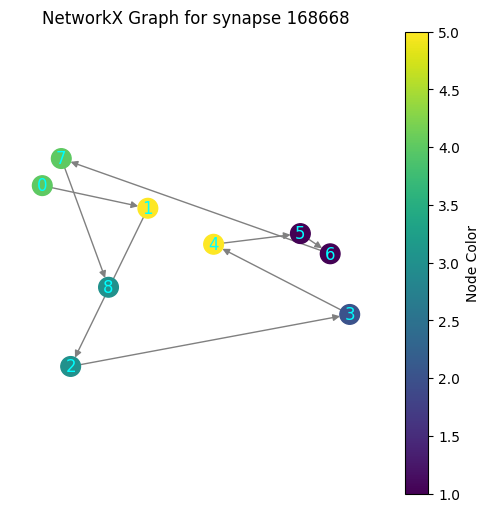

In [8]:
df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        grapherFlag,
        clusteringFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )


no repeated synIDs


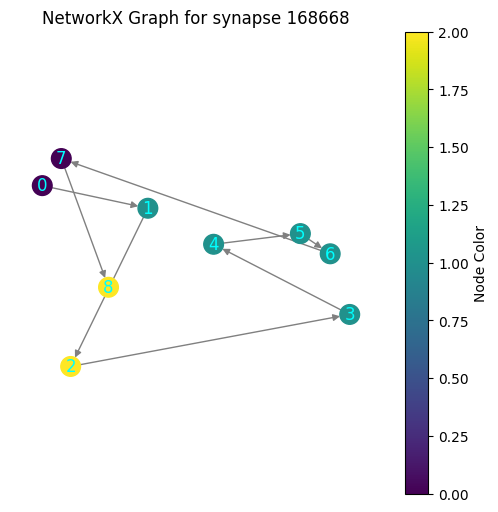

In [15]:
clusteringAlgorithmFlag = 1
df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        grapherFlag,
        clusteringFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )

no repeated synIDs


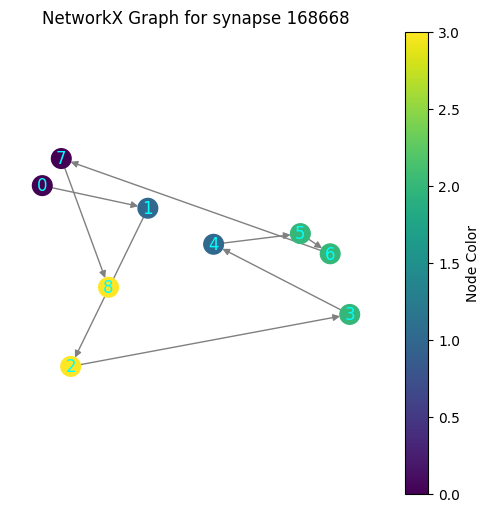

In [16]:
clusteringAlgorithmFlag = 2
df = total(
        csv_file_path,
        evtype,
        singleSynFlag,
        grapherFlag,
        clusteringFlag,
        clusteringAlgorithmFlag,
        plotFlag

          )

In [9]:
df.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/NOr_02.21.2020_Data1_2.csv', index=True)
# df4.to_csv('/home/gerard/nextcloud/analysis/synaptic_computation/results/df4.csv', index=True)

In [5]:
# print(df3)

In [12]:
pixel_size = 86.6667
eps_nm = 50
eps = eps_nm / pixel_size   # Maximum distance between samples to be considered part of the same cluster
print(eps, 'Maximum distance between samples to be considered part of the same cluster')

mask_ID = (df['synID'] == singleSynFlag[1])
df_syn = df.loc[mask_ID]

if df_syn.iloc[-1]['synID'] == df_syn.iloc[0]['synID']:
    points = df_syn[['x', 'y']]

    # Compute pairwise distances using Euclidean distance
    distances = pdist(points.values, metric='euclidean')

    # Convert to squareform to get the condensed distance matrix
    condensed_matrix = squareform(distances)
    print(condensed_matrix)
    print

0.5769228550296711 Maximum distance between samples to be considered part of the same cluster
[[0.         0.70662228 1.19775811 2.18130774 1.18503383 1.71792561
  1.93621671 0.21651309 0.79386766]
 [0.70662228 0.         1.15201536 1.49256084 0.49059208 1.0117489
  1.2298504  0.65333661 0.57762995]
 [1.19775811 1.15201536 0.         1.85763167 1.23060916 1.73662891
  1.85158661 1.36192063 0.57442186]
 [2.18130774 1.49256084 1.85763167 0.         1.00207446 0.61978018
  0.41695476 2.14559028 1.5883575 ]
 [1.18503383 0.49059208 1.23060916 1.00207446 0.         0.57211703
  0.76550637 1.14387398 0.74299573]
 [1.71792561 1.0117489  1.73662891 0.61978018 0.57211703 0.
  0.23566697 1.639952   1.30370882]
 [1.93621671 1.2298504  1.85158661 0.41695476 0.76550637 0.23566697
  0.         1.86693131 1.46710019]
 [0.21651309 0.65333661 1.36192063 2.14559028 1.14387398 1.639952
  1.86693131 0.         0.89726907]
 [0.79386766 0.57762995 0.57442186 1.5883575  0.74299573 1.30370882
  1.46710019 0.89

In [14]:
from scipy.spatial.distance import squareform
import numpy as np



# Iterate through the elements of the square distance matrix
for i in range(condensed_matrix.shape[0]):
    for j in range(i + 1, condensed_matrix.shape[1]):  # Only consider upper triangle
        if condensed_matrix[i, j] < eps:
            print(f"Value {condensed_matrix[i, j]} is smaller than {eps}")
            print(f"Row index: {i}, Column index: {j}")


Value 0.2165130868891593 is smaller than 0.5769228550296711
Row index: 0, Column index: 7
Value 0.49059208059563936 is smaller than 0.5769228550296711
Row index: 1, Column index: 4
Value 0.5744218610405413 is smaller than 0.5769228550296711
Row index: 2, Column index: 8
Value 0.41695475937870463 is smaller than 0.5769228550296711
Row index: 3, Column index: 6
Value 0.5721170302254119 is smaller than 0.5769228550296711
Row index: 4, Column index: 5
Value 0.2356669740599226 is smaller than 0.5769228550296711
Row index: 5, Column index: 6
